In [1]:
%load_ext autoreload
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, precision_recall_curve, auc, accuracy_score
import nibabel

import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed
from IPython.core.debugger import set_trace
import os

import torch
from torch import nn
from torch import autograd
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchio as tio

import yaml
from easydict import EasyDict as edict

from utils import check_patch, pad_arrays, normalize, load, create_dicts, trim, video, video_comparison
from IPython.core.display import display, HTML
from train import DiceScoreBinary
from datasets import create_datasets

from multiprocessing import cpu_count
N_CPU = cpu_count()

SEED = 42
%autoreload 2

# Creating dataset

In [2]:
# labels_components = np.load('labels_info.npy', allow_pickle=True).item()
# single_component_keys = {k for k,v in labels_components.items() if len(v['cc3d'][0]) == 2}

# USE_GEOM_FEATURES = True
# GEOM_FEATURES = ['thickness', 'sulc', 'curv']

# root_label = '../fcd_data/normalized_label'
# root_data = '../fcd_data/normalized_data/'
# root_geom_features = '../fcd_data/preprocessed_data_anadezhda/'

# paths_dict = create_dicts(root_label,
#                          root_data,
#                          root_geom_features, 
#                          single_component_keys,
#                          USE_GEOM_FEATURES, 
#                          GEOM_FEATURES)

In [3]:
# metadata = np.load('metadata.npy', allow_pickle=True).item()

# torchio patches

In [4]:
# root = '../fcd_data/normalized_tensors'
# metadata = np.load('metadata.npy',allow_pickle=True).item()
# metadata_key = 'test'
# labels = metadata[metadata_key]

# paths = [os.path.join(root, f'tensor_{k}') for k in labels]

In [5]:
# plt.ioff()
# camera = video_comparison(list(tensor_dict.values()))
# animation = camera.animate() # animation ready
# HTML(animation.to_html5_video()) # displaying the animation

In [6]:
# idx = 0
# tensor_dict = torch.load(paths[idx])
# brain_tensor_torch = tensor_dict['brain'].unsqueeze(0)
# mask_tensor_torch = tensor_dict['mask']
# label_tensor_torch = tensor_dict['label']

# brain_tensor_torch, label_tensor_torch, mask_tensor_torch = trim(brain_tensor_torch, 
#                                                                 label_tensor_torch,
#                                                                 mask_tensor_torch)

# sampling_map = label_tensor_torch.clone()
# sampling_map[sampling_map == 0] = 0.5

In [7]:
# sums = [torch.load(paths[idx])['label'].sum() for idx in range(len(paths))]

In [8]:
# (label_tensor_torch == 0).sum()*0.001

# Forward pass: training

In [9]:
# model = torchvision.models.video.r2plus1d_18(pretrained=False, progress=True) 

# conv3d_1 = model.stem[0]
# model.stem[0] = nn.Conv3d(in_channels=1,
#                                      out_channels=conv3d_1.out_channels,
#                                      kernel_size=conv3d_1.kernel_size,
#                                      padding=conv3d_1.padding,
#                                      bias=conv3d_1.bias)

# model.fc = nn.Linear(model.fc.in_features, 1)

In [10]:
# # augmentation
# symmetry = tio.RandomFlip(axes=0)
# bias = tio.RandomBiasField(coefficients=0.3)
# noise = tio.RandomNoise(std=(0,1e-3))
# affine = tio.RandomAffine(scales=(0.9, 1.1, 0.9, 1.1, 0.9, 1.1), 
#                          degrees=5,
#                          translation=(1,1,1),
#                          center='image',
#                          default_pad_value=0)
# rescale = tio.RescaleIntensity(out_min_max=(0, 1))
# augmentation = tio.Compose([symmetry, bias, noise, affine, rescale]) 

In [11]:
# # forward pass
# patch_size = 32
# queue_length = 100
# samples_per_volume = 30

# subject = tio.Subject(
#             t1=tio.ScalarImage(tensor=brain_tensor_torch),
#             label=tio.LabelMap(tensor=label_tensor_torch.unsqueeze(0)),
#             sampling_map = sampling_map.unsqueeze(0), # 
#             diagnosis='positive'
#                      )
# subject = augmentation(subject)

# subjects_dataset = tio.SubjectsDataset([subject])
# sampler = tio.data.WeightedSampler(patch_size, 'sampling_map')

# # sampler = tio.data.LabelSampler(patch_size, 'label', label_probabilities={0:0, 1:1})
# patches_queue = tio.Queue(
#     subjects_dataset,
#     queue_length,
#     samples_per_volume,
#     sampler,
#     num_workers=4,
# )

# patches_loader = DataLoader(
#     patches_queue,
#     batch_size=10,
#     num_workers=0,  # this must be 0
# )

# num_epochs = 1
# for epoch_index in range(num_epochs):
#     for patches_batch in patches_loader:
#         inputs = patches_batch['t1'][tio.DATA]  # key 't1' is in subject
#         targets = patches_batch['label'][tio.DATA]  # key 'brain' is in subject
#         logits = model(inputs)  # model being an instance of torch.nn.Module
        
#         break

In [12]:
# PATCH_FCD_THRESHOLD = 0.5 # decrease to increase recall
# N_fcd = label_tensor_torch.sum()
# targets_ = targets.sum([-1,-2,-3]) / N_fcd > PATCH_FCD_THRESHOLD
# targets_ = targets_.type(torch.float32)

# # logits_ = logits #logits.squeeze(1).mean([-1,-2,-3])

In [13]:
# criterion = nn.BCEWithLogitsLoss()
# criterion(logits_, targets_)

In [14]:
# logits_prob_np = torch.sigmoid(logits_).detach().cpu().numpy().squeeze(1)
# targets_np = targets_.detach().cpu().numpy().squeeze(1)

# Validation

In [15]:
# subject = tio.Subject(
#             t1=tio.ScalarImage(tensor=brain_tensor_torch),
#             label=tio.LabelMap(tensor=label_tensor_torch.unsqueeze(0)),
#             diagnosis='positive'
#                      )

# patch_overlap = patch_size//2 
# grid_sampler = tio.inference.GridSampler(
#     subject, # validation subject
#     patch_size,
#     patch_overlap,
# )

# patch_loader = torch.utils.data.DataLoader(grid_sampler, batch_size=32)

# aggregator = tio.inference.GridAggregator(grid_sampler, overlap_mode='average')
# # aggregator_topk = tio.inference.GridAggregator(grid_sampler)

# model = nn.Identity().eval()
# with torch.no_grad():
#     for patches_batch in tqdm(patch_loader):
#         input_tensor = patches_batch['t1'][tio.DATA]
#         targets = patches_batch['label'][tio.DATA]
        
#         targets_ = targets.squeeze(1).sum([-1,-2,-3]) / N_fcd > PATCH_FCD_THRESHOLD
#         targets_ = targets_.type(torch.float32)
        
#         locations = patches_batch[tio.LOCATION]
        
# #         logits = model(input_tensor)
# #         labels = logits.argmax(dim=tio.CHANNELS_DIMENSION, keepdim=True)
# #         outputs = labels
        
#         outputs = torch.ones_like(targets)*targets_[...,None,None,None,None]
        
#         aggregator.add_batch(outputs, locations)
# #         aggregator.add_batch(outputs_topk, locations)
        
# output_tensor = aggregator.get_output_tensor()

In [16]:
# brain = brain_tensor_torch[0].numpy()
# label = label_tensor_torch.numpy()
# label_pred = output_tensor[0].numpy()

# plt.ioff()
# camera = video_comparison([brain,brain], masks=[label, label_pred], titles=['gt', 'pred'])
# animation = camera.animate() # animation ready
# HTML(animation.to_html5_video()) # displaying the animation

In [17]:
# DiceScoreBinary(output_tensor[None,...], label_tensor_torch[None,None,...])

# Model output

In [3]:
device = torch.device('cuda:3')

In [4]:
logdir = './logs_clf/resnet1p2_ps32_bs1_TSG@20.12.2021-02:27:01/'
with open(os.path.join(logdir, 'config.yaml')) as fin:
    config = edict(yaml.safe_load(fin))

In [5]:
model = torchvision.models.video.r2plus1d_18(pretrained=False, progress=False) 
conv3d_1 = model.stem[0]
input_channels = 1 # MRI brain itself
if config.dataset.use_features:
    input_channels += len(config.dataset.features) if hasattr(config.dataset,'features') else 0
model.stem[0] = nn.Conv3d(in_channels=input_channels,
                         out_channels=conv3d_1.out_channels,
                         kernel_size=conv3d_1.kernel_size,
                         padding=conv3d_1.padding,
                         bias=conv3d_1.bias)
model.fc = nn.Linear(model.fc.in_features, 1)
model = model.to(device)
print('Model created!')


model_dict = torch.load(os.path.join(logdir, 'checkpoints/weights.pth'))
print('LOADING from epoch:',model_dict['epoch'])
model.load_state_dict(model_dict['model_state'])

###################
# CREATE DATASETS #
###################
train_dataset, val_dataset = create_datasets(config)

train_dataloader = DataLoader(train_dataset, batch_size=config.opt.train_batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=config.opt.val_batch_size, shuffle=False)
print('val dataloder len: ', len(val_dataloader), 'train dataloder len: ', len(train_dataloader))

augmentation = None
if config.opt.augmentation:
    symmetry = tio.RandomFlip(axes=0)
    bias = tio.RandomBiasField(coefficients=0.3)
    noise = tio.RandomNoise(std=(0,1e-3))
    affine = tio.RandomAffine(scales=(0.9, 1.1, 0.9, 1.1, 0.9, 1.1), 
                             degrees=5,
                             translation=(1,1,1),
                             center='image',
                             default_pad_value=0)
    rescale = tio.RescaleIntensity(out_min_max=(0, 1))
    augmentation = tio.Compose([symmetry, bias, noise, affine, rescale])

################
# CREATE OPTIM #
################
criterion = {
    "BCE": nn.BCEWithLogitsLoss(), # [logits:float32, target:float32]
}[config.opt.criterion]
opt = optim.Adam(model.parameters(), lr=config.opt.lr)

Model created!
LOADING from epoch: 94
val dataloder len:  8 train dataloder len:  69


In [6]:
loss_name = config.opt.criterion
metric_dict = defaultdict(list)
patch_size = config.dataset.patch_size
patch_batch_size = config.dataset.patch_batch_size
queue_length = config.dataset.queue_length
samples_per_volume = config.dataset.samples_per_volume
negative_sampling_prob = config.dataset.negative_sampling_prob
classification_threshold = config.model.classification_threshold
is_train = False

dices = []
brains = []
labels_pred = []
labels = []

with torch.no_grad():
    iterator = enumerate(val_dataloader)

    for iter_i, (brain_tensor, label_tensor) in tqdm(iterator):

        #####################
        # SETUP DATALOADERS #
        #####################
        # brain_tensor - [1,C,H,W,D]
        # label_tensor - [1,1,H,W,D]
        sampling_map = label_tensor[0].clone() # leave only channel dim
        sampling_map[sampling_map == 0] = negative_sampling_prob
        subject = tio.Subject(t1=tio.ScalarImage(tensor=brain_tensor[0]),
                              label=tio.LabelMap(tensor=label_tensor[0]),
                              sampling_map=sampling_map)

       
        patch_overlap = patch_size//2 
        grid_sampler = tio.inference.GridSampler(
            subject, # validation subject
            patch_size,
            patch_overlap,
        )

        patch_loader = torch.utils.data.DataLoader(grid_sampler, batch_size=patch_batch_size)
        aggregator = tio.inference.GridAggregator(grid_sampler, overlap_mode='average')

        ########################
        # ITERATE OVER PATCHES #
        #############################################################################
        N_fcd = label_tensor.sum() # number of FCD pixels in target
        # number of FCD pixels in patch to be considered as FCD patch
        PATCH_FCD_THRESHOLD = config.dataset.patch_fcd_threshold 
        metric_dict_patch = defaultdict(list)
        for patches_batch in patch_loader:

            inputs = patches_batch['t1'][tio.DATA].to(device)  # [bs,C,p,p,p]
            targets = patches_batch['label'][tio.DATA].to(device) # [bs,1,p,p,p]

            logits = model(inputs)

            targets_ = targets.sum([-1,-2,-3]) / N_fcd > PATCH_FCD_THRESHOLD
            targets_ = targets_.type(torch.float32)

            loss = criterion(logits, targets_) # [bs,1], [bs,1]

            locations = patches_batch[tio.LOCATION]
            outputs = torch.ones_like(targets)*torch.sigmoid(logits)[...,None,None,None] # [bs,1,p,p,p]
            aggregator.add_batch(outputs, locations)

        output_tensor = aggregator.get_output_tensor().unsqueeze(1) # [1,1,H,W,D]
        # output_tensor = output_tensor / output_tensor.max()
        # set_trace()
        dice = DiceScoreBinary(output_tensor, label_tensor).item()  
        dices.append(dice)    
            
        brain = brain_tensor.detach().cpu().numpy()[0,0] 
        label = label_tensor.detach().cpu().numpy()[0,0]
        label_pred = output_tensor.detach().cpu().numpy()[0,0]

        # crucial for freein CUDA memory
        del output_tensor, brain_tensor, label_tensor

        brains.append(brain)
        labels.append(label)
        labels_pred.append(label_pred)

8it [13:32, 101.51s/it]


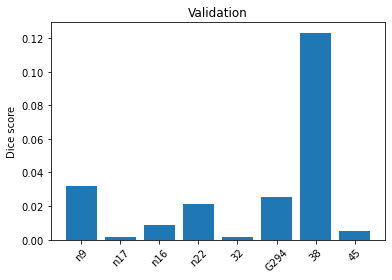

In [7]:
val_labels = val_dataloader.dataset.labels

plt.ion()
plt.figure()
plt.bar(val_labels, dices)
exp_name = logdir.split('/')[1]
plt.title(f'Validation')
plt.ylabel('Dice score')
plt.xticks(rotation=45)
plt.show()

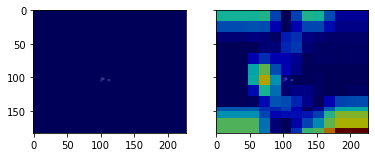

In [8]:
ind = np.argmax(dices)
plt.ioff()
camera = video_comparison([brains[ind], brains[ind]], 
                          [labels[ind], labels_pred[ind]], 
                          n_slides=128)
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation